In [1]:
from PIL import Image 
import os 
import numpy as np 

In [2]:
dst_path = os.path.join(os.path.abspath(os.path.join(os.path.abspath(os.curdir), os.pardir)), 'data', 'raw')

In [3]:
dst_path

'D:\\data_analyst\\nova_ims\\dl\\dl_project\\data\\raw'

In [4]:
# categories
os.listdir(dst_path)

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

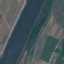

In [5]:
test_img = Image.open(os.path.join(dst_path, 'River', 'River_1.jpg')) 
test_img

In [6]:
test_img.mode

'RGB'

In [7]:
test_img.size

(64, 64)

In [8]:
test_img_arr = np.array(test_img)
test_img_arr

array([[[111, 115, 114],
        [111, 115, 114],
        [101, 101, 101],
        ...,
        [ 75,  86,  88],
        [ 80,  89,  94],
        [ 81,  90,  95]],

       [[111, 115, 114],
        [111, 115, 114],
        [100, 102, 101],
        ...,
        [ 75,  86,  88],
        [ 79,  88,  93],
        [ 80,  89,  94]],

       [[107, 113, 111],
        [108, 112, 111],
        [ 98, 100,  99],
        ...,
        [ 74,  88,  91],
        [ 77,  88,  92],
        [ 77,  88,  92]],

       ...,

       [[ 46,  68,  82],
        [ 46,  68,  82],
        [ 47,  66,  81],
        ...,
        [ 56,  82,  83],
        [ 57,  81,  83],
        [ 58,  82,  84]],

       [[ 45,  67,  81],
        [ 45,  67,  81],
        [ 46,  65,  80],
        ...,
        [ 56,  82,  83],
        [ 58,  82,  82],
        [ 62,  83,  84]],

       [[ 44,  66,  80],
        [ 44,  66,  80],
        [ 45,  64,  79],
        ...,
        [ 55,  81,  82],
        [ 59,  83,  83],
        [ 65,  86,  87]]

- Each 64x64 picture has 3 RGB channels and its represented by a (64, 64, 3) tensor 
- The network has to be fed in batches, receiving as input a tensor with (batch_size, 64, 64, 3) dimensions 
- The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general one should use small input values to get faster convergence, thus reducing training time

In [9]:
test_img_arr.shape

(64, 64, 3)

For now, a simple scalar multiplication is used to scale the pictures.

In [10]:
(1/255) * test_img_arr

array([[[0.43529412, 0.45098039, 0.44705882],
        [0.43529412, 0.45098039, 0.44705882],
        [0.39607843, 0.39607843, 0.39607843],
        ...,
        [0.29411765, 0.3372549 , 0.34509804],
        [0.31372549, 0.34901961, 0.36862745],
        [0.31764706, 0.35294118, 0.37254902]],

       [[0.43529412, 0.45098039, 0.44705882],
        [0.43529412, 0.45098039, 0.44705882],
        [0.39215686, 0.4       , 0.39607843],
        ...,
        [0.29411765, 0.3372549 , 0.34509804],
        [0.30980392, 0.34509804, 0.36470588],
        [0.31372549, 0.34901961, 0.36862745]],

       [[0.41960784, 0.44313725, 0.43529412],
        [0.42352941, 0.43921569, 0.43529412],
        [0.38431373, 0.39215686, 0.38823529],
        ...,
        [0.29019608, 0.34509804, 0.35686275],
        [0.30196078, 0.34509804, 0.36078431],
        [0.30196078, 0.34509804, 0.36078431]],

       ...,

       [[0.18039216, 0.26666667, 0.32156863],
        [0.18039216, 0.26666667, 0.32156863],
        [0.18431373, 0

The function creates a tensor with the desired dimensions full of zeros, then they are replaced by each picture's RGB values

In [11]:
def merge_img(num_img): 
    data = np.zeros(shape=[num_img,64,64,3])
    for i in range(1, num_img + 1):   
        img = Image.open(os.path.join(dst_path, 'River', 'River_{}.jpg'.format(i))) 
        img_arr = np.array(img) 
        data[i-1][:64][:64][:64] = img_arr  
    return data

In [12]:
data = merge_img(2500)

In [13]:
data.shape

(2500, 64, 64, 3)

The labels are represented by a 1D vector, encoded with the category number

In [14]:
targets = 8 * np.ones(2500)

In [15]:
targets.shape

(2500,)